# About dataset
Title: Haberman's Survival Data

Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999

Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics Conference, Boston, pp. 104-122.
Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83.
Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI.
Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
Missing Attribute Values: None

source : https://kaggle.com/

# Objective -
**1. Explain High level statistics**

**2. find out the most significant feature from given dataset, for survival of patient** 
**Using -** 
1. Bi-variate analysis - 2D scatter plot, pairplots
2. Uni-variate analysis - Histogram, PDF, CDF, Boxplot, Violinplot 
3. Statistics - Mean, Std.dev, Median, Percentile, Quantiles, MAD
 
**3. Perform desired analysis to find out how the most significant feature impacts on the survival status of the patient.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
dataset = pd.read_csv('haberman.csv')
dataset.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# 1. High level analysis

**Q.1. How many datapoints(rows) and features(columns) haberman dataset has?**

In [4]:
dataset.shape

(306, 4)

**Q 2. what are the feature names?**

In [5]:
dataset.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

**Q.3. Which are the class labels ?**

In [6]:
dataset['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

# observation(s) - 
1. Dependent variable status is an integer, it has to be boolean - '0 , 1' or 'yes - no'
2. It  seems, 3rd answer is very crucial here, We can see, data is quite unbalanced. We must have equal or near to the equal number of datapoints for each class label to say - 'data is balanced'.

**All important summary of total dataset**

In [7]:
dataset.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# 2. 2-D Scatter Plot

In [8]:
dataset.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


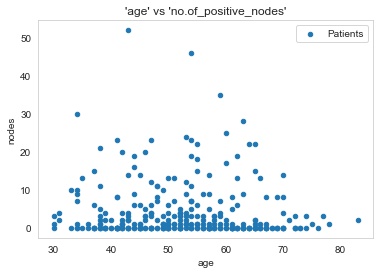

In [48]:
# 1. 'age' vs 'no.of_positive_nodes'
dataset.plot(kind = 'scatter', x = 'age', y = 'nodes', label = "Patients")
plt.title("'age' vs 'no.of_positive_nodes'")
plt.grid()
plt.show()

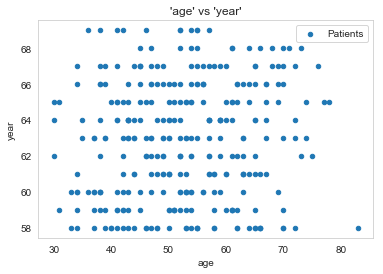

In [51]:
# 2. 'age' vs 'year'
dataset.plot(kind = 'scatter', x = 'age', y = 'year', label = "Patients")
plt.grid()
plt.title("'age' vs 'year'")
plt.legend()
plt.show()

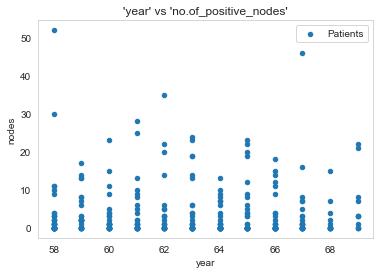

In [52]:
# 3. 'year' vs 'no.of_positive_nodes'
dataset.plot(kind = 'scatter', x = 'year', y = 'nodes', label = 'Patients' )
plt.title("'year' vs 'no.of_positive_nodes'")
plt.grid()
plt.show()

# Observation(s) - 
1. 2D scatter plot without color scheme is total blunder.
2. We cannot even distinguish between Survived patients and Died patients from above 2D scatter plots.

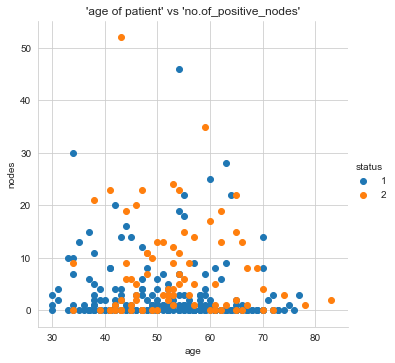

In [56]:
# 2D scatter  plot with color scheme
# 'age' vs 'no.of_positive_nodes'

sns.set_style('whitegrid')
sns.FacetGrid(dataset, hue = 'status', height = 5)\
   .map(plt.scatter, 'age', 'nodes' )\
   .add_legend()
plt.title("'age of patient' vs 'no.of_positive_nodes'")
plt.show()

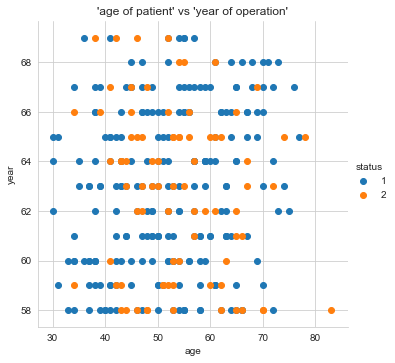

In [57]:
# 'age' vs 'year'

sns.set_style('whitegrid')
sns.FacetGrid(dataset, hue = 'status', height = 5)\
   .map(plt.scatter, 'age', 'year')\
   .add_legend()
plt.title("'age of patient' vs 'year of operation'")
plt.show()

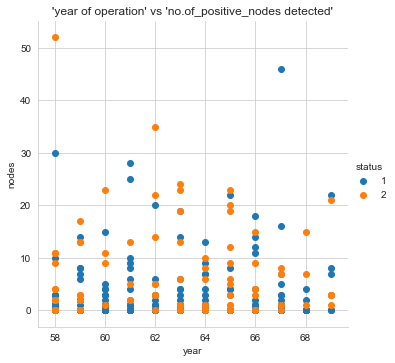

In [58]:
# 'year' vs 'no.of_positive_nodes'

sns.set_style('whitegrid')
sns.FacetGrid(dataset, hue = 'status', height = 5)\
   .map(plt.scatter, 'year', 'nodes')\
   .add_legend()
plt.title("'year of operation' vs 'no.of_positive_nodes detected'")
plt.show()

# Observation(s) -
1. 2D Scatter plots with color scheme are way too better than plots-without color scheme. In these plots we can clearly distinguish which patients suvived and patients who died. 
2. Still, not getting much information out of 2D scatter plots.
3. None of the above plots are showing exact classification of 'survival_status of patients' explicitly. many datapoints still overlap each other.

# 3. Pair plots

In [150]:
dataset_1 = dataset
dataset_1.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [154]:
dataset_1['status'] = dataset_1['status'].replace([1,2],['yes','no'])
dataset_1.head()

,age,year,nodes,status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


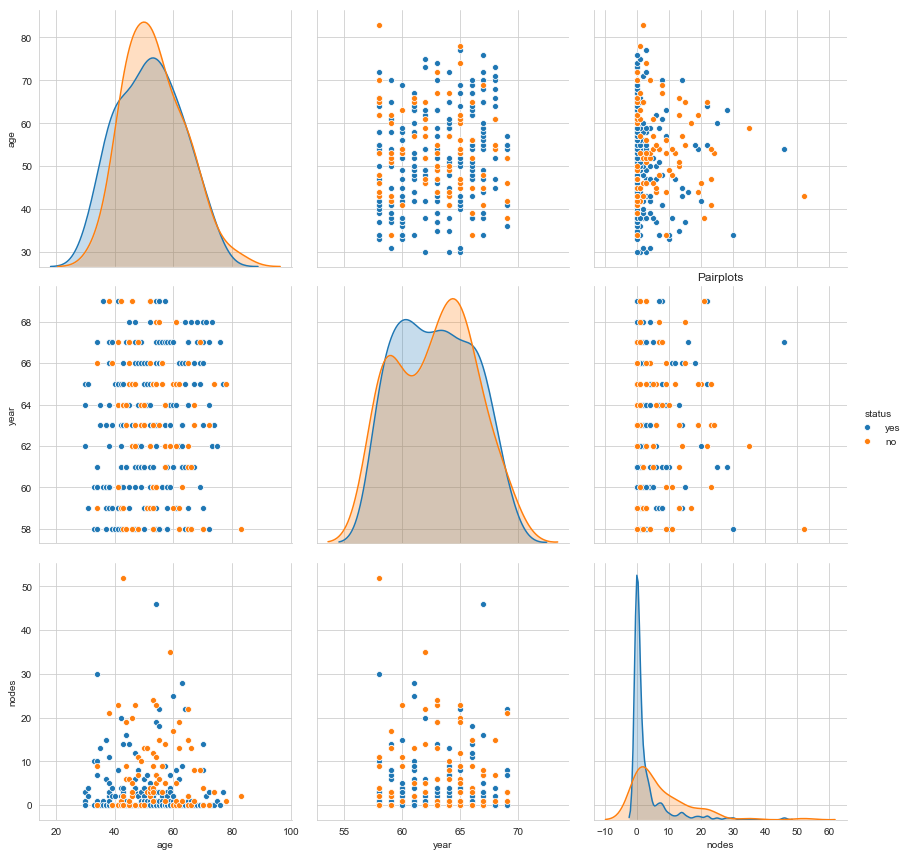

In [157]:
import warnings 
warnings.filterwarnings("ignore") 

sns.set_style('whitegrid')
sns.pairplot(dataset_1, hue = 'status', height = 4)
sns.set_style("whitegrid")
plt.title('Pairplots')
plt.show()

# Observation(s) -
1. pdf line touching high sky in 3rd pdf, Hence it seems useful.
2. Other plots are not reaaly very nice in perspective of classification of 'survival_status' of the patient.

# 4. Histogram, PDF, CDF

In [16]:
dataset.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


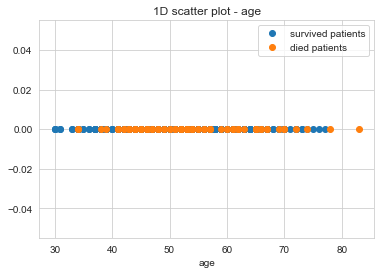

In [131]:
# 1. 1D scatter plot
import numpy  as np
survived = dataset[dataset['status'] == 1]
died = dataset[dataset['status'] == 2]
# for 'age'

plt.plot(survived['age'], np.zeros_like(survived['age']), 'o', label = 'survived patients')
plt.plot(died['age'], np.zeros_like(died['age']), 'o', label = 'died patients')
plt.title('1D scatter plot - age')
plt.legend()
plt.xlabel('age')
plt.show()

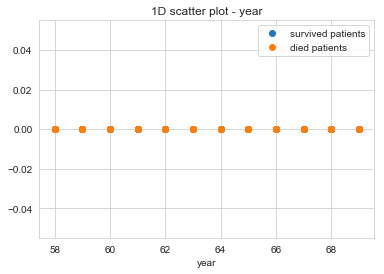

In [132]:
# for 'year'
plt.plot(survived['year'], np.zeros_like(survived['year']), 'o',label = 'survived patients')
plt.plot(died['year'], np.zeros_like(died['year']), 'o', label = 'died patients')
plt.title('1D scatter plot - year')
plt.legend()
plt.xlabel('year')
plt.show()

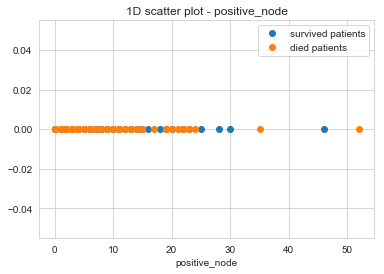

In [133]:
# for 'positive_node'
plt.plot(survived['nodes'], np.zeros_like(survived['nodes']), 'o',label = 'survived patients')
plt.plot(died['nodes'], np.zeros_like(died['nodes']), 'o', label = 'died patients')
plt.title('1D scatter plot - positive_node')
plt.xlabel('positive_node')
plt.legend()
plt.show()

# Observation(s)-
1. 1D scatter plot fails to give us insights of exactly how many points are there in specific range.
2. Most of the points are overlapping each other in the plot, Hence It's dificult to arrive at any conclusion.

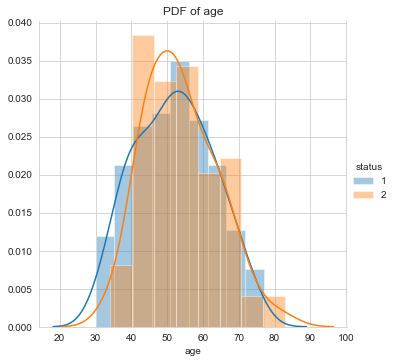

In [130]:
# 2. PDF - 'age'

sns.set_style('whitegrid')
sns.FacetGrid(dataset, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend()
plt.title('PDF of age')
plt.show()

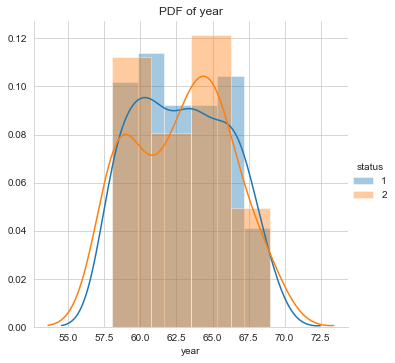

In [134]:
# PDF - 'year'

sns.set_style('whitegrid')
sns.FacetGrid(dataset, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend()
plt.title('PDF of year')
plt.show()

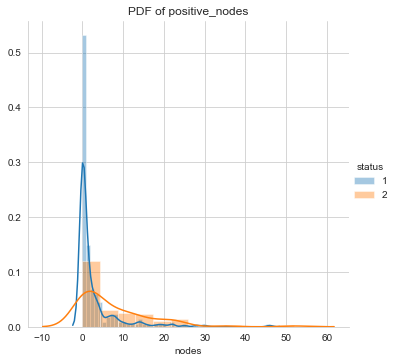

In [135]:
# PDF - 'positive_nodes'

sns.set_style('whitegrid')
sns.FacetGrid(dataset, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.title('PDF of positive_nodes')
plt.show()

# Observation(s) -
1. PDF gives us nice insights of exactly how many points are there in a specific range.
2. 'positive_nodes' PDF states, very high amount of 'survived-datapoints' lies from '0 to 5'
3. (in positive_nodes PDF) Also, too many 'died- datapoints' overlap 'survived-datapoints' at '0 to 5'

[0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376] 

[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ] 

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667] 



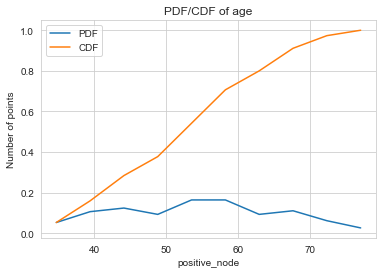

In [143]:
#3. CDF - 'age'

counts, bin_edges = np.histogram(survived['age'], bins = 10, density = True)
print(counts, '\n')
print(bin_edges, '\n')

PDF = counts/sum(counts)
print(PDF, '\n')

plt.plot(bin_edges[1:], PDF, label = 'PDF')
plt.plot

CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:], CDF, label = 'CDF')
plt.xlabel('positive_node')
plt.ylabel('Number of points')
plt.legend()
plt.title('PDF/CDF of age')
plt.show()

[0.16969697 0.0969697  0.09292929 0.06464646 0.08888889 0.09292929
 0.06060606 0.08888889 0.08484848 0.06868687] 

[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ] 

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556] 



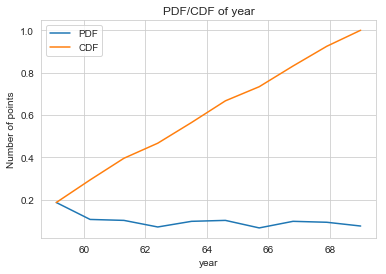

In [144]:
# CDF - 'year'

counts, bin_edges = np.histogram(survived['year'], bins = 10, density = True)
print(counts, '\n')
print(bin_edges, '\n')

PDF = counts/sum(counts)
print(PDF, '\n')

plt.plot(bin_edges[1:], PDF,label = 'PDF')
plt.plot

CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:], CDF, label = 'CDF')
plt.xlabel('year')
plt.ylabel('Number of points')
plt.legend()
plt.title('PDF/CDF of year')
plt.show()

[0.18164251 0.0173913  0.00483092 0.0057971  0.00386473 0.00096618
 0.00193237 0.         0.         0.00096618] 

[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ] 

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444] 



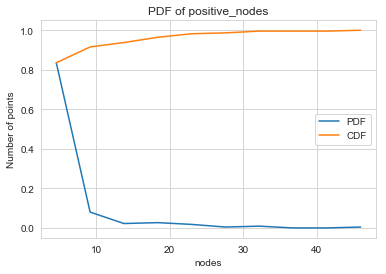

In [145]:
# CDF - 'nodes'

counts, bin_edges = np.histogram(survived['nodes'], bins = 10, density = True)
print(counts, '\n')
print(bin_edges, '\n')

PDF = counts/sum(counts)
print(PDF, '\n')

plt.plot(bin_edges[1:], PDF, label = 'PDF')
plt.plot

CDF = np.cumsum(PDF)
plt.plot(bin_edges[1:], CDF, label = 'CDF')
plt.xlabel('nodes')
plt.ylabel('Number of points')
plt.legend()
plt.title('PDF of positive_nodes')
plt.show()

# Observation(s) -
1. We can observe, Pairplots PDF and CDF of 'age' and 'year' features are quite similar. And they have low impact on survival status of patient.
2. Pairplots, PDF and finally CDF also pointing towards 'Nodes' Feature.
3. Fianlly, we can assume 'Nodes' is the most impactful Feature for sake of further analysis.

# 5. mean, median, std.dev

In [26]:
survived.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [27]:
died.describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


# Observation(s) -
1. These tables are giving nice insight of importance of 'number_of_positive_auxilliary_nodes'.

*mean of 'number_of_positive_auxilliary_nodes' for survived patients = 2.791111*

*mean of 'number_of_positive_auxilliary_nodes' for died patients = 7.456790*

**This is a significance difference of means than any other existing parameters.**

2. Ofcourse, std.dev. or spread for the same, are way too high. Hence exact conclusion is still hanging.


3. 'age', 'year of operation', these features don't impact much on survival status of patient.

In [28]:
# Median absolute deviation - MAD
from statsmodels import robust
print(robust.mad(survived['nodes']))
print(robust.mad(died['nodes']))

0.0
5.930408874022408


# Observation(s) -

Median for 'number_of_positive_auxilliary_nodes' for survived patients is '0', Therefore, MAD for the same is also '0'.

Hence MAD has no significance for this dataset.

# 6. BOXplot

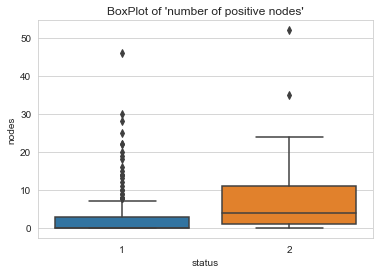

In [146]:
sns.boxplot(x = 'status', y = 'nodes', data = dataset)
plt.title("BoxPlot of 'number of positive nodes'")
plt.show()

# Observation(s) -
1. Boxplot plots percentiles of the dataset, we can clearly see almost 75% of survived patient has less than 4 positive nodes detected 
2. Too many points are scattering over uppar whisker. 
* whisker = 1.5*IQR (IQR = number of observations lie between 25th to 75th percentile).
* Any conclusion may fail, if datapoints are scattered or overlapped with each other all around the graph.

# 7. Violin plot - 

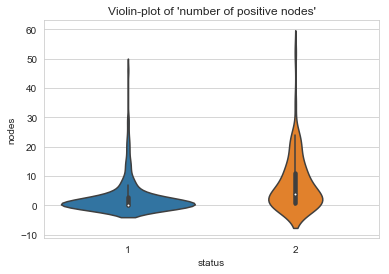

In [148]:
sns.violinplot(x = 'status', y = 'nodes', data = dataset)
plt.title("Violin-plot of 'number of positive nodes'")
plt.show()

# Observation(s) -
1. Violin plot is combination of histogram/PDF an Box plots
2. There is significant relationship between 'survival status of patients' and 'positive auxilliary nodes less than 5'
3. Both of the plots are touching peaks at values '0 to 6' = 'No.of positive nodes'.  

# 8. Final Statistics - 

In [31]:
survived['nodes'].value_counts()

0     117
1      33
2      15
3      13
4      10
7       5
8       5
6       4
14      3
10      2
22      2
5       2
9       2
46      1
11      1
30      1
13      1
15      1
16      1
18      1
19      1
20      1
25      1
28      1
12      1
Name: nodes, dtype: int64

In [32]:
cnt = 0
for i in (sorted(survived['nodes'])):
    if i <= 4 :
        
        cnt += 1
        
print('Total number of survived patients who has postive_nodes less than and equal to 4 =',cnt , '\n')
for j in survived['nodes'].shape:
    print(((cnt/j) *100),'% patients survived if they have positive_nodes less than 4')

Total number of survived patients who has postive_nodes less than and equal to 4 = 188 

83.55555555555556 % patients survived if they have positive_nodes less than 4


In [33]:
cnt = 0
for i in (sorted(died['nodes'])):
    if i <=  4:
        
        cnt += 1
        
print('Total number of DIED patients who has postive_nodes less than and equal to 4 =',cnt , '\n')
for j in died['nodes'].shape:
    print(((cnt/j) *100),'% patients DIED if they have positive_nodes less than 4')

Total number of DIED patients who has postive_nodes less than and equal to 4 = 42 

51.85185185185185 % patients DIED if they have positive_nodes less than 4


# Final Observation(s) - 
1. 'Number of positive axillary nodes' is the only class label, impacts on survival of patient
2. If a 'Number of positive auxilliary nodes' detected in any patient are less than or equal to 4, Then 83.55% chances are there, that patient will survive for next 5 Years from detection or existence of nodes.
3. Still 51.85185185185185% patients DIED if they have positive_nodes less than or 4, This is because, Unbalanced dataset.If we had more data for Died patients, we would have predicted more accurately.
4. We can observe Box-plot, much points are scattered beyond uppar whiskers. This tells us data of 306 patients is really not enough to find out high probabilistic(above 75%) values for survival of patient.